# Plane wave expansion in spherical functions

In [1]:
import numpy as np
import scipy.special as sps
import matplotlib.pyplot as plt

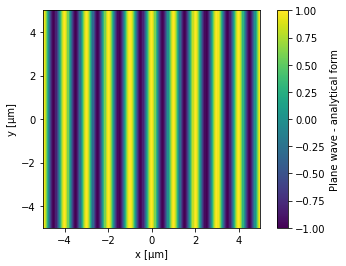

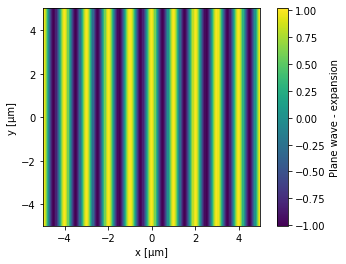

In [17]:
# geometry parameters
max_x = 5  # width of computatinal domain [µm]
n0 = 1     # refractive index of the surrounding
# simulation parameters
wavelength = 1   # wavelength [µm]
Nx = 201  # number of grid points
m = 50    # number of the expansion orders retained

xx = np.linspace(-max_x,max_x,Nx)
yy = np.linspace(-max_x,max_x,Nx)
[X,Y] = np.meshgrid(xx,yy)

def pw_expansion(wavelength, m, n0, max_x, Nx):
    k0 = 2*np.pi/lam*n0

    u_an = np.exp(1j*k0*X) #Plane wave in analytical form
    
    M = np.arange(0,m)

    R = np.sqrt(X**2+Y**2)
    theta = np.arctan2(Y, X)

    u = np.zeros([len(X), len(Y)], dtype=np.complex128) #Coefficients for plane wave in spherical functions

    for mi in M:
        pl = sps.lpmv(0,mi,np.cos(theta)) #associated legendre polynomial
        u += (1j**mi)*(2*mi+1)*sps.spherical_jn(mi,k0*R,derivative=False)*pl
    return u, u_an


u_exp, u_an = pw_expansion(lam, m, n0, max_x, Nx)

plt.figure()
plt.pcolormesh(X, Y, np.real(u_an))
plt.xlabel('x [µm]')
plt.ylabel('y [µm]')
plt.gca().set_aspect('equal')
cb = plt.colorbar()
cb.set_label('Plane wave - analytical form')
plt.show()

plt.figure()
plt.pcolormesh(X, Y, np.real(u_exp))
plt.xlabel('x [µm]')
plt.ylabel('y [µm]')
plt.gca().set_aspect('equal')
cb = plt.colorbar()
cb.set_label('Plane wave - expansion')
plt.show()